In [4]:
cd ../life_matrices/  # cd to life_matrices 

[Errno 2] No such file or directory: '../life_matrices/ # cd to life_matrices'
/Users/kwheeler/Desktop/LIFE/life_movie_project


In [5]:
import pickle

In [6]:
ls

README.md              life_matrices/         nltk_data/
WordNet-3.0/           life_matrices.tar.gz
life.tar.gz            life_regressors.ipynb


In [7]:
cd life_matrices/

/Users/kwheeler/Desktop/LIFE/life_movie_project/life_matrices


In [72]:
file = open('part1_raw_data.pkl', 'rb')
part1_file = pickle.load(file)

In [9]:
#part1_file #I want all_features

In [10]:
time = len(part1_file['features'])*2    # 'time' is the number of seconds in the clip. 
                                        #  Multipy by 2 to account for 2 second sampling rate
print time

932


In [11]:
#need to pass list of all_features through wn.check_list
raw_feature_list = part1_file['all_features']
feature_dict = part1_file['features']
raw_feature_list
feature_dict

{0: ['water', 'light', 'splash', 'music'],
 2: ['water', 'light', 'splash', 'bubble', 'music'],
 4: ['water', 'splash', 'bubble', 'music', 'light'],
 6: ['water', 'splash', 'bubble', 'words', 'music'],
 8: ['water', 'bubble', 'words', 'music'],
 10: ['bubble', 'words', 'music'],
 12: ['bubble', 'words', 'music'],
 14: ['bubble', 'words', 'music'],
 16: ['words', 'music', 'bubble'],
 18: ['words', 'earth', 'music', 'narration'],
 20: ['Earth', 'narration', 'music', 'words'],
 22: ['Earth', 'words', 'narration', 'music'],
 24: ['Earth', 'words', 'music', 'narration'],
 26: ['Earth', 'words', 'music', 'narration'],
 28: ['Earth', 'words', 'music', 'narration'],
 30: ['Earth', 'narration', 'music'],
 32: ['Earth', 'music', 'narration'],
 34: ['Earth', 'music', 'narration'],
 36: ['Earth', 'music', 'narration'],
 38: ['Earth', 'music', 'narration'],
 40: ['Earth', 'music', 'narration'],
 42: ['Earth', 'music', 'narration'],
 44: ['Earth', 'music', 'narration'],
 46: ['Earth', 'music', 'narr

In [12]:
#raw_feature_list  # Not WordNet compatible

In [13]:
import numpy as np

In [14]:
# --- not sure why I'm opening this, need to figure out. I think it is an old saved matrix/array? ---
#file2 = open('final.pkl', 'rb')
#final_file = pickle.load(file2)
#final_file

In [15]:
#feature_list

In [16]:
present = []
missing = []

In [17]:
# --- replacing this code ---
def tp(movie_length):   
    tp = range(0, movie_length,2) #2 is for 2 second intervals
    return tp #return list of timepoints
# --- revised code ---
#tp = feature_dict.keys()  # except this doesn't work right!!
#  ^use this new code in revised notebook, if that happens...


#might need to switch f_list and timepoint to flip matrix? --> done.
def create_matrix(timepoint,f_list):
    X = np.zeros((len(timepoint),len(f_list)))  #build the matrix of zeros based on list length of features and time
    return X

def make_list_wncomp(listname): #make the features in a list (present) WordNet compatible
    for feature in listname:
        f = wn.synsets(feature)
        if f[0] not in feature_list:
            feature_list.append(f[0])
    #return feature_list

def check_wn(feature): #check if a feature is in WordNet
    if wn.synsets(feature) == []:
        missing.append(feature)
    else:
        present.append(feature)
    #return present

def check_list(listname): #check a list using check_wn function
    for i in listname:
        check_wn(i)
    #return present

def find_hypernyms(feat_list): #from a list of features, append hypernyms to a list
    for i in feat_list:
        f = [i]
        while f!=[]:
            hyplist.append(f[0])
            f = f[0].hypernyms()
    #return hyplist

def compare_lists(list1,list2): #compare 2 lists; append elements of list1 to list2 if they 
                                #are not already present
    for i in list1:
        if i not in list2:
            list2.append(i)
    #return list2

def define(feat_list): #print the definitions of all of the features in a list
    for i in feat_list:
        print i.name,":",i.definition
    #return feat_list

#in matrix, change 0s to 1s when a feature is present at that same timepoint
def update_matrix(movie_list, matrix_list, matrix_name, time):
    for f in movie_list:
        if f in matrix_list:
            i = matrix_list.index(f)
            matrix_name[time/2,i] = 1
    return matrix_name

def set_indices(feat_list):
    for i,x in enumerate(feat_list):
        index_list.append((i,x))
    #return index_list   


In [18]:
### KEEP THIS BOX COMMENTED OUT ###
#import nltk
#nltk.download()

In [19]:
from nltk.corpus import wordnet as wn

In [20]:
check_list(raw_feature_list)

In [21]:
#print len(missing)
#missing  # many of the words on this list need to be correct for spelling, etc and then can be added back in


In [22]:
removed_words = ['Seabed', '4', '2', '7', 'varies', '1', 'circles', '3', 'hippos', 'two', 'plants', 'spots', '5']
# don't remember why I removed these terms

In [23]:
for word in removed_words:
    if word in present:
        present.remove(word)

In [24]:
#present

In [25]:
feature_list = []

make_list_wncomp(present)

hyplist = []

find_hypernyms(feature_list)

compare_lists(hyplist,feature_list)

matrix_list = feature_list
#matrix_list

In [26]:
index_list = []
# tp(932)  # movie is 932 seconds. Time point occur ever 2 seconds.
print time

932


In [51]:
#build the matrix
m_l = tp(time)   #tp(movie_length) #t for timepoints # Had: m_l = tp(466*4) I think I multiply by 4 because previously
                                                      # I had divided by 2 to get a tp every 2 seconds...?
matrix_name = create_matrix(m_l,matrix_list)
print len(m_l)
matrix_name.shape

466


(466, 347)

In [54]:
set_indices(matrix_list)

In [29]:
# clear lists, because using same functions as above^ (except this isn't working like the orginial code)
present = []
feature_list = []
hyplist = []
#tp_dict  # NameError: 'tp_dict' is not defined

In [30]:
#print time
#print m_l

In [31]:
tp_dict = part1_file['features']
timepoint_feature_list = tp_dict[930]  # this is wrong/broken
check_list(timepoint_feature_list)
make_list_wncomp(present)
find_hypernyms(feature_list)
compare_lists(hyplist,feature_list)
print time
print timepoint_feature_list

932
['fading out']


In [32]:
print "time: ",time
print "feature_list: ",feature_list

time:  932
feature_list:  []


In [33]:
print "timepoint_feature_list: ",timepoint_feature_list  # not sure what's going on here...
print len(matrix_name)   # matrix got cut in half, down to 233 timepoints --> related to timepoint_feature_list issue
print "matrix_name: ", list(matrix_name)

timepoint_feature_list:  ['fading out']
466
matrix_name:  [array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
     

In [34]:
print len(tp_dict)  # this is the correct size/length, though
print time
matrix_list == feature_list
matrix_name.shape

466
932


(466, 337)

In [35]:
for f in feature_list:  # feature_list that is WNcomp
    if f in matrix_list:    # ummm so feature_list and matrix_list are identical... 
                            # I think one is supposed to be the features for that specific timepoint
        i = matrix_list.index(f)
        print i
        matrix_name[time/2,i] = 1

In [36]:
#in matrix, change 0s to 1s when a feature is present at that same timepoint
def update_matrix(movie_list, matrix_list, matrix_name, time):
    for f in movie_list:  # feature_list that is WNcomp
        if f in matrix_list:  # ummm so feature_list and matrix_list are identical...
            i = matrix_list.index(f)
            matrix_name[time/2,i] = 1
    return matrix_name

In [37]:
update_matrix(feature_list,matrix_list,matrix_name,time)  # ummm so feature_list and matrix_list are identical...
#error here because of inconsistency with length of movie (930s) 
#and number of timepoints (930s/2s clips)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [38]:
seq1=range(0,466*2,2)                   ### seq1,  time (466)
final1=matrix_name[:,seq1]  
final1_dict={}                      ### final1
for s in range(0,466):                  ### time (466)
    final1_dict[seq1[s]]=final1[:,s] 
final1_dict

IndexError: index 338 is out of bounds for axis 1 with size 337

In [ ]:
#for time in tp_dict:
#    print time

In [69]:
print len(matrix_list)
#feature_list

347


In [70]:
#make the list of features that will be used as the labels
check_list(raw_feature_list)    #all_feats_list was previous input, don't remember why <-- not wncomp yet, that's why
                            #check list of features, return 'present' for features that are in WordNet


make_list_wncomp(present)       #makes features WN compatible: wn.synsets('word')
#print "feature_list: ", feature_list         #creates feature_list


find_hypernyms(feature_list)    #finds hypernyms of feature_list features
#print "hyplist: ", hyplist                   #creates hyplist of hypernyms


compare_lists(hyplist,feature_list) #adds hypernyms to the feature_list
#print "feature_list: ", feature_list         #updates feature_list


matrix_list = feature_list      #matrix_list is list of all features
print "matrix_list: ", len(matrix_list)               #feature_list can be cleared and re-used


#tp(movie_length)                #t for timepoints
m_l = tp(466*4)

matrix_name = create_matrix(matrix_list,m_l)   #create a matrix of zeros
    #edit matrix_name           # row/feature X column/timepoint

set_indices(matrix_list)        #creates index_list of tuples (index,feature)
                                # set indices for timepoint_list too?


#note to watch out for: some code needs to be changed for each new matrix
#for exmaple, part1, part1_raw_data, seq1, final1, and numbers associated with the length of the movie (seconds)
#lines that require changes are denoted with ###comments


"""
import pickle
part1=pickle.load(file('/home/brain/Desktop/part1_raw_data.pkl'))   ### change part1, part1_raw_data
tp_dict=part1['features']                       ### change part1
#loop over all timepoints and get list of features to update matrix
for time in tp_dict:        #will probably need to rename tp_dict to match movie
     # print "time: ",time

#clear lists (because using same functions as above^)
     present = []    #but don't clear [missing]
     feature_list = []
     hyplist = []
   

     #check if features are in WN --> append to present or missing
     tp_list = tp_dict[time]
     #print tp_list
       
     timepoint_feature_list = tp_dict[time]
     #print "tp_feature_list: ",timepoint_feature_list

     check_list(timepoint_feature_list)     #returns present
    
     #check_list(tp_list)
     

     #make features WN compatible
     make_list_wncomp(present)
     #print "feature_list: ",feature_list

     #find hypernyms of feature_list
     find_hypernyms(feature_list)
     #print "hyplist: ",hyplist

     #update feature_list to include hypernyms
     compare_lists(hyplist,feature_list)
    
     #print     
     #print "time: ",time
     #print "feature_list: ",feature_list
    
     #print "timepoint_feature_list: ",timepoint_feature_list
     #print "matrix_name: ", matrix_name



     #change 0s to 1s for features present during that timepoint
     update_matrix(feature_list,matrix_list,matrix_name,time)
     #feature_list replaced timepoint_feature_list (might be temporary?)
     #edit matrix_name
     #print
     #print "matrix_list: ",matrix_list
"""
print
print "---------------------------------------------------------"


#The axes need to be flipped!  --> .T to transpose (from Matteo)

for f in feature_list:
    #print "f: ",f
    if f in matrix_list:
        i = matrix_list.index(f)
        matrix_name[i,time] = 1

print
#print 'matrix_list: ',matrix_list
#print
print 'matrix_name: ',matrix_name

#final is the final matrix, 60 by 466 (the case for movie 1 code data)
seq1=range(0,466*2,2)                   ### seq1,  time (466)
final1=matrix_name[:,seq1]              ### final1, seq1

#final_dict is the final dictionary, with each key noting the timepoint

final1_dict={}                      ### final1
for s in range(0,466):                  ### time (466)
    final1_dict[seq1[s]]=final1[:,s]            ###final1_dict, seq1, final1



#I need to figure out why this random '1' is in the matrix and why nothing else is updating. 
#I'm guessing it's only updating the very last feature to appear, which is a hypernym of something basic like "white"

#I also need to figure out how to label the features


# len(part2['features'].keys())



matrix_list:  347

---------------------------------------------------------


IndexError: index 932 is out of bounds for axis 1 with size 932

In [71]:
print len(part1_file['features'].keys())
list(matrix_name[0:2])
#transposed_matrix = matrix_name.T

466


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [41]:
np.savetxt('test.txt',matrix_name)

In [43]:
#np.savetxt?

In [44]:
%matplotlib inline

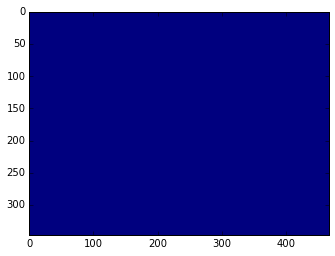

In [65]:
from matplotlib import pyplot as pl
pl.imshow(transposed_matrix)

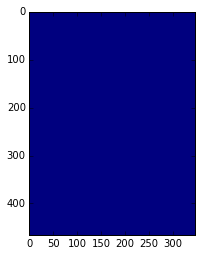

In [66]:
pl.imshow(matrix_name)